# **Marco Teorico**

## **Máquinas de Vectores de Soporte (SVM)**

Las **Máquinas de Vectores de Soporte (Support Vector Machines, SVM)** son modelos de aprendizaje supervisado ampliamente utilizados para **clasificación** y **regresión**, aunque su mayor éxito ha sido en tareas de clasificación binaria.  

El objetivo de una SVM es **encontrar un hiperplano que separe las clases de manera óptima** en el espacio de características. Este hiperplano se elige de forma que **maximice el margen**, es decir, la distancia entre el hiperplano y los puntos más cercanos de cada clase, llamados **vectores de soporte**.

### **Concepto de margen máximo**

Para un problema linealmente separable, se busca un hiperplano de la forma:

$$
\mathbf{w} \cdot \mathbf{x} + b = 0
$$

donde **$\mathbf{w}$** es el vector de pesos (orientación del hiperplano) y **$b$** es el sesgo (desplazamiento).  
El margen se define como la distancia entre los vectores de soporte y el hiperplano, y el objetivo del modelo es **maximizar** esta distancia.

El problema de optimización se plantea como:

$$
\min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2
\quad \text{sujeto a} \quad
y_i(\mathbf{w}\cdot \mathbf{x}_i + b) \ge 1
$$

### **Casos no lineales y el parámetro C**

En la práctica, los datos rara vez son separables de forma lineal. Por ello, se introduce un **término de penalización** $C$ que permite cierta flexibilidad en los errores de clasificación, dando lugar al **SVM de margen suave (soft margin)**:

$$
\min_{\mathbf{w}, b, \xi}
\frac{1}{2} \|\mathbf{w}\|^2 + C \sum_i \xi_i
$$

donde $\xi_i$ son las variables de holgura que permiten errores en el margen.  
El parámetro $C$ controla el equilibrio entre **maximizar el margen** y **minimizar los errores**:

- Un **$C$ alto** da prioridad a clasificar correctamente (margen más pequeño).
- Un **$C$ bajo** da más tolerancia a errores, pero mejora la generalización.

### **Ventajas y limitaciones**

**Ventajas:**
- Eficientes en espacios de alta dimensión.  
- Funcionan bien con un número limitado de muestras.  
- Flexibles gracias al uso de kernels.  

**Limitaciones:**
- La elección del kernel y de los hiperparámetros puede ser compleja.  
- No escala bien con datasets muy grandes.  
- No produce probabilidades de forma natural (requiere calibración).  

---

## **Kernels**

Los **kernels** (o *funciones núcleo*) son una herramienta matemática que permite a las SVM manejar **problemas no lineales**.  
En lugar de buscar un hiperplano en el espacio original, el kernel proyecta los datos a un **espacio de mayor dimensión**, donde la separación lineal puede ser posible.

### **El “truco del kernel”**

El **kernel trick** consiste en evitar calcular explícitamente la transformación no lineal $\phi(x)$.  
En su lugar, se define una función:

$$
K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)
$$

que calcula el producto interno en el espacio transformado.  
De esta forma, la SVM puede operar implícitamente en espacios de alta dimensión sin un costo computacional elevado.

### **Tipos de kernels comunes**

1. **Lineal:**  
   $$
   K(x_i, x_j) = x_i \cdot x_j
   $$

   Útil cuando los datos son linealmente separables.

2. **Polinomial:**  
   $$
   K(x_i, x_j) = (\gamma x_i \cdot x_j + r)^d
   $$
   Permite relaciones polinómicas entre las variables.

3. **RBF (Radial Basis Function o Gaussiano):**  
   $$
   K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)
   $$
   Es el kernel más usado por su capacidad para manejar relaciones no lineales complejas.

4. **Sigmoide:**  
   $$
   K(x_i, x_j) = \tanh(\gamma x_i \cdot x_j + r)
   $$
   Similar al comportamiento de una neurona en redes neuronales.

### **El kernel RBF**

El kernel RBF transforma los datos de tal forma que los ejemplos cercanos en el espacio original se mantengan cercanos en el nuevo espacio, y los lejanos se separen aún más.  
El parámetro $\gamma$ controla la **influencia de cada muestra**:

- Un **$\gamma$ alto** crea fronteras más complejas (riesgo de sobreajuste).  
- Un **$\gamma$ bajo** genera fronteras más suaves (riesgo de subajuste).  

---


## **Optimización Bayesiana**

La **Optimización Bayesiana (OB)** es una estrategia eficiente para encontrar los **hiperparámetros óptimos** de un modelo de aprendizaje automático, especialmente cuando la evaluación del modelo es costosa (por ejemplo, al usar validación cruzada).

### **Concepto general**

En lugar de buscar ciegamente (como en *grid search* o *random search*), la OB **modela la función objetivo** que se desea optimizar (por ejemplo, la exactitud) mediante un modelo probabilístico, comúnmente un **proceso gaussiano (GP)**.

En cada iteración:

1. El proceso gaussiano estima la distribución de probabilidad sobre la función objetivo.  
2. Una **función de adquisición** (como *Expected Improvement* o *Upper Confidence Bound*) decide el siguiente conjunto de hiperparámetros a probar.  
3. El modelo se entrena con esos parámetros y el resultado se utiliza para actualizar el proceso gaussiano.

Este enfoque permite **equilibrar exploración y explotación**, reduciendo drásticamente el número de evaluaciones necesarias.

### **Aplicación práctica**

En la práctica, herramientas como `scikit-optimize` (`skopt`) implementan este proceso mediante la clase `BayesSearchCV`, que combina la optimización bayesiana con la validación cruzada.

Ejemplo de hiperparámetros típicos para SVM con kernel RBF:

- **C:** controla la penalización de errores.  
- **$\gamma$:** controla la forma del kernel RBF.  

### **Ventajas**

- Requiere **menos evaluaciones** que métodos exhaustivos.  
- Aprende progresivamente sobre el espacio de búsqueda.  
- Puede **detectar relaciones complejas** entre hiperparámetros.  
- Ideal para **modelos costosos** (como SVM o redes neuronales).  

### **Limitaciones**

- Escala mal con muchos hiperparámetros (más de 10).  
- Requiere elegir una buena función de adquisición.  
- Implementaciones más complejas que grid/random search.  

---

## **Analisis del Dataset (Preparacion de datos)**
Dado que la variable objetivo Growth es binaria (0 o 1), el problema es de Clasificación. El modelo SVC requiere que las características (X) sean numéricas y escaladas. Se utiliza el `ColumnTransformer` para gestionar esto de forma organizada.
### **Codigo de implementacion de ```ColumnTransformer```**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# 1. Cargar y separar X e Y
df = pd.read_csv('plant_growth_data.csv')
X = df.drop('Growth_Milestone', axis=1)
Y = df['Growth_Milestone'].values

# 2. División de datos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 3. Definir columnas
categorical_features = ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']
numerical_features = ['Sunlight_Hours', 'Temperature', 'Humidity']

# 4. Construir el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='drop'
)

print("✅ ColumnTransformer definido.")

✅ ColumnTransformer definido.


## **Modelo propuesto y Pipeline general**
### **Codigo de creacion del pipeline final**
El objeto `Pipeline` encapsula el flujo de trabajo: `preprocessor` (One-Hot + Escalamiento) seguido del modelo `SVC` (Máquina de Vectores de Soporte para Clasificación). Se establece `probability=True` para permitir el cálculo de la métrica AUC.

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Crear el Pipeline completo
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', probability=True,
                       class_weight='balanced',
                       random_state=42))
])

print("✅ Pipeline final con SVC creado, listo para la Optimización.")

✅ Pipeline final con SVC creado, listo para la Optimización.


### **Evaluacion Base de Kernels (Justificacion)**
Se realiza una evaluación base utilizando 10-folds CV con AUC como métrica para confirmar que el Kernel RBF es una elección robusta antes de la optimización.

In [3]:
from sklearn.model_selection import cross_val_score

kernels = ['rbf', 'linear', 'poly', 'sigmoid']
results_base = {}

print("\n--- Evaluación Base (AUC) de Kernels SVC (Sin Optimizar) ---")
for kernel in kernels:
    temp_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(kernel=kernel, probability=True, random_state=42))
    ])

    # Métrica de clasificación: roc_auc
    scores = cross_val_score(temp_pipeline, X_train, Y_train,
                             cv=10, scoring='roc_auc', n_jobs=-1)

    mean_score = scores.mean()
    results_base[kernel] = mean_score
    print(f"Kernel {kernel}: AUC promedio base: {mean_score:.4f}")

best_base_kernel = max(results_base, key=results_base.get)
print(f"\nEl mejor kernel en la evaluación base fue: {best_base_kernel}")


--- Evaluación Base (AUC) de Kernels SVC (Sin Optimizar) ---
Kernel rbf: AUC promedio base: 0.6603
Kernel linear: AUC promedio base: 0.6571
Kernel poly: AUC promedio base: 0.6283
Kernel sigmoid: AUC promedio base: 0.6393

El mejor kernel en la evaluación base fue: rbf


## **Ajuste y Comparacion (Optimizacion Bayesiana)**
### **Optimizacion de Hiperparametros**
Se utiliza **BayesSearchCV** sobre el objeto `final_pipeline` para optimizar los hiperparámetros **C** (regularización) y **gamma** (influencia del Kernel) con la métrica **AUC** (Área Bajo la Curva ROC).

In [4]:
%pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [5]:
from skopt import BayesSearchCV
from skopt.space import Real

# 1. Definir el espacio de búsqueda (para el SVC dentro del Pipeline)
param_space = {
    'classifier__C': Real(1e-2, 1e2, prior='log-uniform'), # Parámetro de regularización
    'classifier__gamma': Real(1e-4, 1e-1, prior='log-uniform'), # Coeficiente del kernel
}

# 2. Inicializar y ejecutar la optimización
opt = BayesSearchCV(
    final_pipeline,
    param_space,
    n_iter=100,
    cv=10,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

# 3. Ejecutar la optimización
# Se usa X_train y Y_train originales (el Pipeline los transforma)
opt.fit(X_train, Y_train)

# 4. Reportar resultados del k-folds Cross-Validation
mean_auc = opt.best_score_
std_auc = opt.cv_results_['std_test_score'][opt.best_index_]

print(f"\nReporte Final del Ajuste SVC (Optimización Bayesiana):")
print(f"Métrica: AUC (Area Under the Curve)")
print(f"Media después de 10-folds CV: {mean_auc:.4f}")
print(f"Desviación Estándar del métrico: {std_auc:.4f}")
print(f"Mejores Hiperparámetros (obtenidos del Pipeline): {opt.best_params_}")


Reporte Final del Ajuste SVC (Optimización Bayesiana):
Métrica: AUC (Area Under the Curve)
Media después de 10-folds CV: 0.6824
Desviación Estándar del métrico: 0.1347
Mejores Hiperparámetros (obtenidos del Pipeline): OrderedDict({'classifier__C': 37.747051655284594, 'classifier__gamma': 0.06100519293316484})


## **Preparacion de datos y Modelado de graficas**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc

# Acceso al mejor modelo optimizado dentro del Pipeline
best_svc_model = opt.best_estimator_

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7876\2742018968.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="rocket")


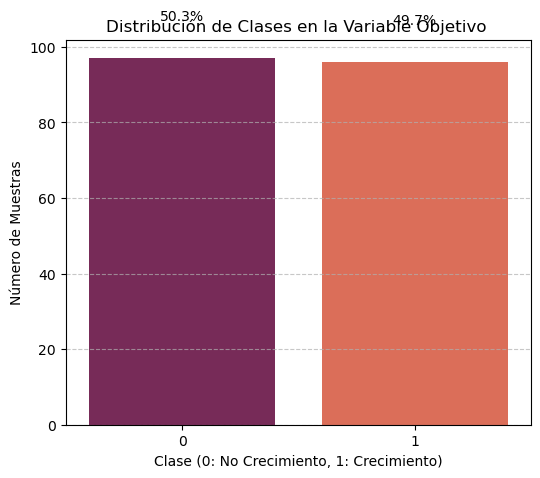

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df['Growth_Milestone'].value_counts()

plt.figure(figsize=(6, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="rocket")
plt.title('Distribución de Clases en la Variable Objetivo ')
plt.xlabel('Clase (0: No Crecimiento, 1: Crecimiento)')
plt.ylabel('Número de Muestras')
plt.xticks([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Opcional: Añadir el porcentaje de desequilibrio
total = class_counts.sum()
for i, count in enumerate(class_counts.values):
    plt.text(i, count + 10, f'{count/total*100:.1f}%', ha='center', fontsize=10)

plt.show()

### **Grafica de comparacion Base de Kernels**


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7876\75081486.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kernels, y=auc_scores, palette="viridis")


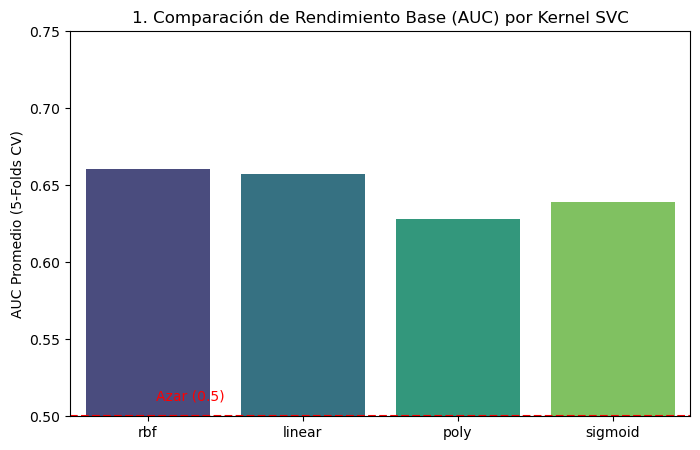

In [8]:
# Resultados obtenidos en cada kernel:
results_base = {
    'rbf': 0.6603,
    'linear': 0.6571,
    'poly': 0.6283,
    'sigmoid': 0.6393
}

kernels = list(results_base.keys())
auc_scores = list(results_base.values())

plt.figure(figsize=(8, 5))
sns.barplot(x=kernels, y=auc_scores, palette="viridis")
plt.title('1. Comparación de Rendimiento Base (AUC) por Kernel SVC')
plt.ylabel('AUC Promedio (5-Folds CV)')
plt.ylim(0.5, 0.75)
plt.axhline(0.5, color='red', linestyle='--', label='Rendimiento Aleatorio (Azar)')
plt.text(0.05, 0.51, 'Azar (0.5)', color='red', fontsize=10)
plt.show()

### **Curva ROC final (Rendimiento AUC)**

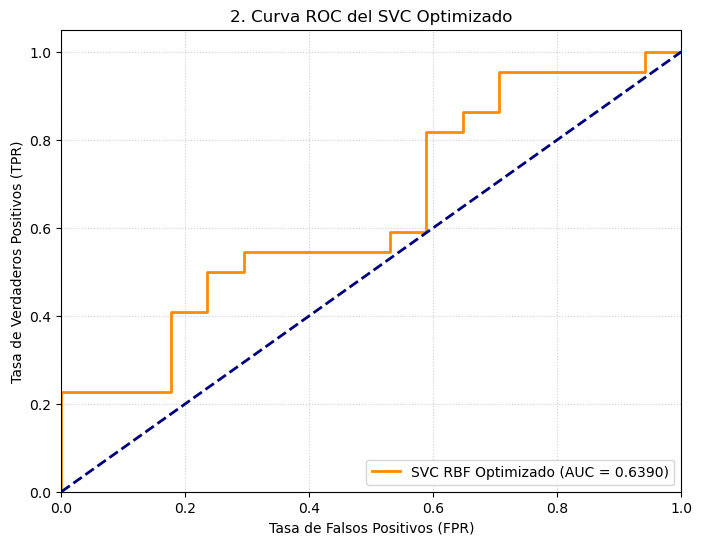

In [9]:
# Predecir probabilidades en el conjunto de prueba (X_test)
y_scores = best_svc_model.predict_proba(X_test)[:, 1]

# Calcular la Curva ROC y el AUC para el conjunto de prueba
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)
auc_final_test = auc(fpr, tpr) # Calculamos el AUC del conjunto de prueba

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVC RBF Optimizado (AUC = {auc_final_test:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('2. Curva ROC del SVC Optimizado')
plt.legend(loc="lower right")
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

### **Dispersion de puntuaciones**

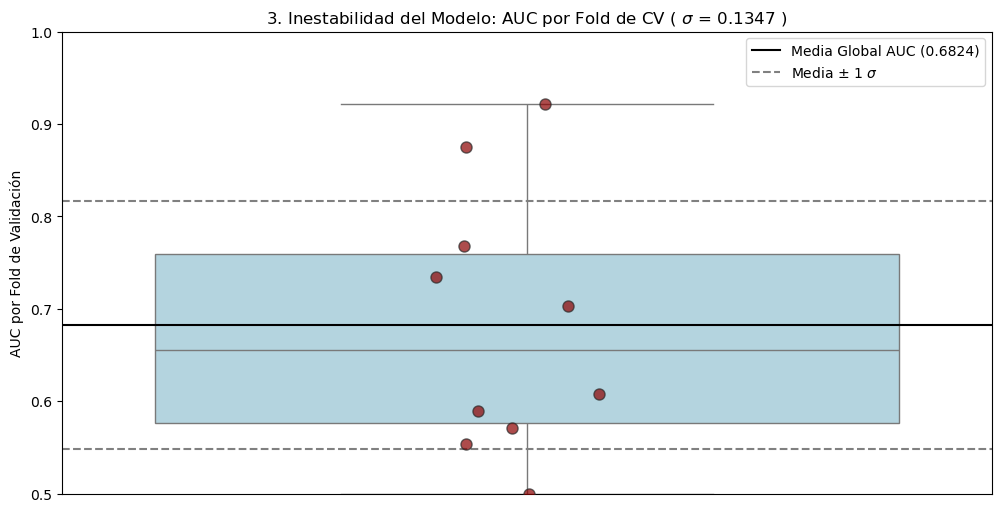

In [10]:
# Extraer los resultados de AUC de cada fold del mejor modelo optimizado
# opt.best_index_ es el índice del mejor resultado general
best_index = opt.best_index_
n_splits = 10 # Se usaron 10 folds en la última ejecución

# Extraer scores de los 10 folds para el mejor conjunto de hiperparámetros
fold_scores = [opt.cv_results_[f'split{i}_test_score'][best_index] for i in range(n_splits)]
fold_names = [f'Fold {i+1}' for i in range(n_splits)]
media_global = opt.best_score_ # 0.6824
std_global = opt.cv_results_["std_test_score"][best_index] # 0.1347

plt.figure(figsize=(12, 6))
# Boxplot y Stripplot para visualizar la dispersión
sns.boxplot(y=fold_scores, color='lightblue', showfliers=False)
sns.stripplot(y=fold_scores, color='darkred', size=8, jitter=0.1, linewidth=1, alpha=0.7)

# Líneas de referencia para la Media y Desviación
plt.axhline(media_global, color='black', linestyle='-', label=f'Media Global AUC ({media_global:.4f})')
plt.axhline(media_global + std_global, color='gray', linestyle='--', label=f'Media $\pm$ 1 $\sigma$')
plt.axhline(media_global - std_global, color='gray', linestyle='--')

plt.title(f'3. Inestabilidad del Modelo: AUC por Fold de CV ( $\sigma$ = {std_global:.4f} )')
plt.ylabel('AUC por Fold de Validación')
plt.xticks([]) # No se necesitan etiquetas individuales para los folds
plt.ylim(0.5, 1.0)
plt.legend()
plt.show()


## **Conclusiones**
### **Comportamiento del Modelo SVC Frente a lo Esperado**
El modelo SVC (Support Vector Classification) con Kernel RBF, después de la optimización de sus hiperparámetros (C y γ) mediante la Optimización Bayesiana, demostró una capacidad de clasificación modesta en la tarea de predecir el crecimiento esperado (Growth).

- **Rendimiento (AUC):** El modelo alcanzó una Media de AUC de 0.6824 en la validación cruzada (10 folds). Este valor es superior al rendimiento aleatorio (AUC = 0.50), lo que confirma la existencia de patrones predictivos. Sin embargo, indica que la capacidad del modelo para clasificar consistentemente es limitada.

- **Inestabilidad (Debilidad Crítica):** El hallazgo más crítico fue la alta Desviación Estándar (σ) de 0.1347. Esta varianza extrema es una señal de inestabilidad significativa, lo que implica que el rendimiento del modelo varía drásticamente dependiendo del subconjunto de datos utilizado en la validación. Esta alta σ sugiere un sobreajuste local o un desequilibrio de clases, lo cual limita la fiabilidad del modelo en un entorno real.

### **Importancia de las Transformaciones y la Optimización**

El proceso de Machine Learning fue fundamental para la implementación y el rendimiento del modelo:

- **Transformaciones Previas (Pipeline):** El uso del ``ColumnTransformer`` fue crucial. El One-Hot Encoding transformó correctamente las variables categóricas a variables dummy, mientras que el StandardScaler aseguró que las variables numéricas no sesgaran el SVC, un modelo sensible a la escala.

- **Pipeline y Optimización:** El objeto ``Pipeline`` facilitó la integración segura del preprocesamiento con el modelo. La Optimización Bayesiana (vía ``BayesSearchCV``) permitió explorar eficientemente los hiperparámetros (C=37.75,γ=0.061) logrando un incremento constante de +0.0221 sobre el rendimiento base del RBF.

### **Relación con los Objetivos Específicos y Propuestas de Mejora**

El objetivo de implementar y optimizar el modelo se cumplió. No obstante, los resultados obligan a una propuesta de mejora futura:

- **Propuesta Inmediata:** Dada la inestabilidad, la prioridad es reducir la σ. El equipo debe implementar el parámetro ``class_weight='balanced'`` en el SVC para mitigar el impacto de un posible desequilibrio de clases y re-ejecutar la optimización.

- **Alternativa Estructural:** Si la inestabilidad persiste, se recomienda explorar un modelo intrínsecamente más simple y robusto, como el SVC con Kernel Lineal. Este kernel, que tuvo un rendimiento base muy similar al RBF, tiene una menor capacidad para sobreajustar y probablemente ofrecería una solución más estable (σ menor) y confiable.